In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline

np.random.seed(20171001)
tf.set_random_seed(20171001)
mnist = input_data.read_data_sets("./data/", one_hot=True)

Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz


In [2]:
cfilter_size = 16
input_size = 14*14*cfilter_size

x = tf.placeholder(tf.float32, [None, 784])
x_image = tf.reshape(x, [-1,28,28,1])

cfilter = tf.Variable(tf.truncated_normal([5,5,1,cfilter_size],stddev=0.1))
cfiltered = tf.nn.conv2d(x_image, cfilter, strides=[1,1,1,1], padding='SAME')

pfiltered = tf.nn.max_pool(cfiltered, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
pfiltered_flat = tf.reshape(pfiltered, [-1, input_size])

In [3]:
hidden_size = 1024

w1 = tf.Variable(tf.truncated_normal([input_size, hidden_size]))
b1 = tf.Variable(tf.zeros([hidden_size]))
h =  tf.nn.relu(tf.matmul(pfiltered_flat,w1) + b1)

w0 = tf.Variable(tf.zeros([hidden_size, 784]))
b0 = tf.Variable(tf.zeros([784]))
y = tf.matmul(h, w0) + b0

t = tf.placeholder(tf.float32, [None, 784])

In [4]:
loss = tf.reduce_sum(tf.square(t-y))
train_step = tf.train.AdamOptimizer().minimize(loss)

In [5]:
from PIL import Image
import os
# Handy George
filenames = os.listdir('./teacher2')
imgs = []
for name in filenames:
    img = Image.open('./teacher2/' + name).convert('L')
    img.thumbnail((28, 28))
    img = np.array(img, dtype=np.float32)
    img = 1-np.array(img / 255)
    img = img.reshape(1, 784)
    imgs.append(img)
imgs = np.array(imgs)
def label2im(labels):
    limgs = []
    for label in labels:
        limgs.append(imgs[np.argmax(label)])
    return np.array(limgs).reshape((-1, 784))

In [6]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
i = 0
imgs = np.array(imgs).reshape([10, 784])
sess.run(pfiltered_flat, feed_dict={x: imgs})
for _ in range(20000):
    i += 1
    batch_xs, batch_ts = mnist.train.next_batch(100)
    batch_ts = label2im(batch_ts)
    sess.run(train_step, feed_dict={x: batch_xs, t: batch_ts})
    if i % 1000 == 0:
        loss_val = sess.run(loss, feed_dict = {x: batch_xs, t: batch_ts})
        print("step: %d, loss: %f" % (i, loss_val))

step: 1000, loss: 364.718567
step: 2000, loss: 246.584625
step: 3000, loss: 232.603149
step: 4000, loss: 173.663361
step: 5000, loss: 135.117645
step: 6000, loss: 109.236092
step: 7000, loss: 126.649933
step: 8000, loss: 65.159042
step: 9000, loss: 82.827332
step: 10000, loss: 59.570076
step: 11000, loss: 80.291435
step: 12000, loss: 58.842056
step: 13000, loss: 49.724976
step: 14000, loss: 51.249512
step: 15000, loss: 51.401787
step: 16000, loss: 37.255650
step: 17000, loss: 57.002640
step: 18000, loss: 46.101173
step: 19000, loss: 31.439362
step: 20000, loss: 22.729956


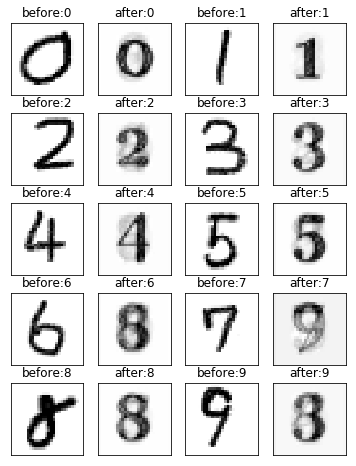

In [7]:
from PIL import Image
import os
filenames = os.listdir('./sample/test_samples')
c = 1
fig = plt.figure(figsize=(6, 8))
labels = []
imgs = []
for name in filenames:
    img = Image.open("./sample/test_samples/" + name).convert('L')
    img.thumbnail((28, 28))
    img = np.array(img, dtype=np.float32)
    img = 1-np.array(img / 255)
    img = img.reshape(1, 784)
    res = sess.run(y, feed_dict={x: img})[0]
    res = res - res[np.argmin(res)]
    res = res / res[np.argmax(res)]

    subplot = fig.add_subplot(5, 4, 2 * c - 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('before:%d' % (c-1))
    subplot.imshow(img.reshape((28, 28)), vmin=0, vmax = 1, cmap=plt.cm.gray_r, interpolation="nearest")
    
    subplot = fig.add_subplot(5, 4, 2*c)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('after:%d' % (c-1))
    subplot.imshow(res.reshape((28, 28)), vmin=0, vmax = 1, cmap=plt.cm.gray_r, interpolation="nearest")
    c += 1

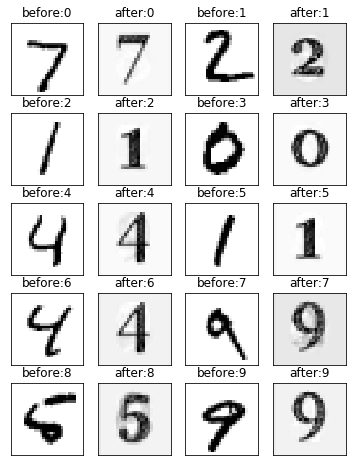

In [11]:
from PIL import Image
c = 1
fig = plt.figure(figsize=(6, 8))
for img in mnist.test.images[0:10]:
    res = sess.run(y, feed_dict={x: [img]})[0]
    res = res - res[np.argmin(res)]
    res = res / res[np.argmax(res)]

    subplot = fig.add_subplot(5, 4, 2 * c - 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('before:%d' % (c-1))
    subplot.imshow(img.reshape((28, 28)), vmin=0, vmax = 1, cmap=plt.cm.gray_r, interpolation="nearest")
    
    subplot = fig.add_subplot(5, 4, 2*c)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('after:%d' % (c-1))
    subplot.imshow(res.reshape((28, 28)), vmin=0, vmax = 1, cmap=plt.cm.gray_r, interpolation="nearest")
    c += 1

(784,)